# АНАТОМИЯ СОЛИДАРНОСТИ
#### Какие политические группы образуются в процессе голосований ООН и как они связаны между собой.

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# 1. Основание

theory...
Акцент на "Профиле голосования", "Коэффициент солидарности" и т.д.

# 2. Сбор данных

In [ ]:
-- Принципы сбора (какие данные)

# 3. Анализ

In [12]:
#pd.read_csv('resolution_vote/' + 'A/RES/ES-11/1'.replace('/', '_') + '.csv')

In [3]:
G = nx.read_gexf('UN_UKRAINE--POLITICAL_CONDITIONS_attr_5.gexf')
len(G)

193

## 3.1 Группы абсолютной солидарности
### Коэффициент солидарности 1

Возможно, что написание текста отчета и иллюстрации вполне может происходить в этом редакторе. Можно ли сделать шрифт крупнее?

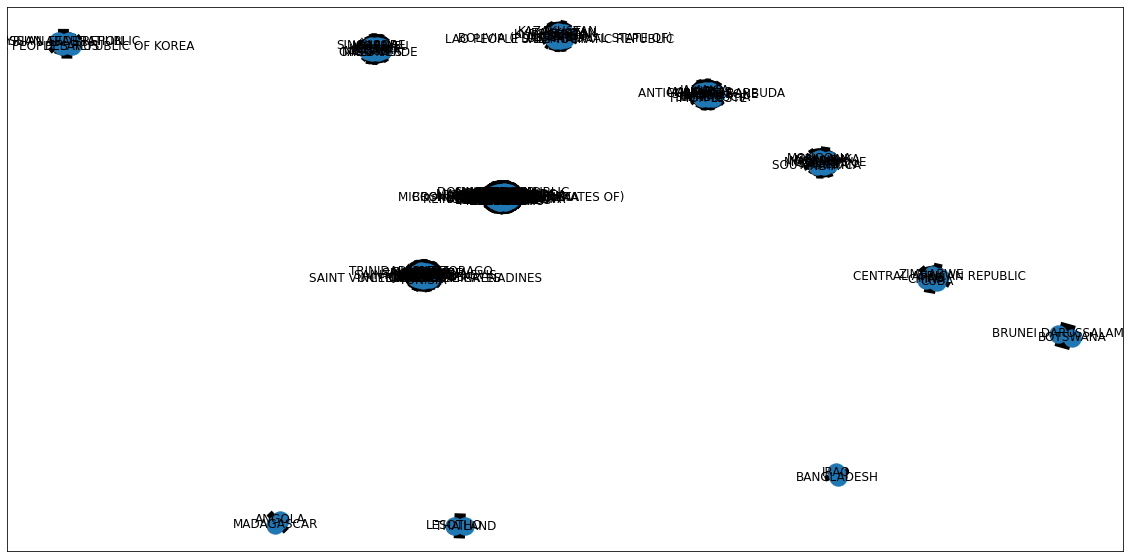

In [3]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 5
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])

# Для убирания отдельных нод
F5 = nx.Graph() 
F5.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F5, seed=0)

for edge in F5.edges(data='weight'):
    nx.draw_networkx_edges(F5, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F5, pos) 

In [4]:
print(len(sorted(nx.connected_components(F5))))
print(len(F5.nodes()))

12
155


#### Профиль солидарности

Профиль солидарности -- характер голосований по каждой резолюции в выбранной теме. Например, в случае с украинским вопросом -- это 5 голосований, 5 резолюций. 31+31+1 = 63 варианта голосований. 63 аозможных профиля.

Выделяется 12 групп с одинаковым профилем солидарности, которые в сумме включают в сябя 155 стран. Остальные 193-155=38 стран имеют собственный профиль голосований

In [12]:
country_name = 'IRAN (ISLAMIC REPUBLIC OF)'
country_name = 'HUNGARY'

for index in range (0, len(list(nx.connected_components(F5)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F5))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F5))[index]
    print(country_arr_test)
    print('______________')


0
True

{'REPUBLIC OF MOLDOVA', 'HUNGARY', 'CROATIA', 'LUXEMBOURG', 'ROMANIA', 'CZECHIA', 'GUATEMALA', 'LIECHTENSTEIN', 'LIBERIA', 'NORTH MACEDONIA', 'SLOVAKIA', 'REPUBLIC OF KOREA', 'JAPAN', 'COLOMBIA', 'MICRONESIA (FEDERATED STATES OF)', 'SEYCHELLES', 'LITHUANIA', 'PANAMA', 'FRANCE', 'MALAWI', 'SAMOA', 'BELGIUM', 'GREECE', "CÔTE D'IVOIRE", 'TUVALU', 'FINLAND', 'ALBANIA', 'PERU', 'COSTA RICA', 'DENMARK', 'AUSTRALIA', 'LATVIA', 'ANDORRA', 'SPAIN', 'PAPUA NEW GUINEA', 'SLOVENIA', 'UNITED KINGDOM', 'BULGARIA', 'NORWAY', 'SAN MARINO', 'MONACO', 'GEORGIA', 'NETHERLANDS', 'PARAGUAY', 'KIRIBATI', 'MALTA', 'URUGUAY', 'POLAND', 'IRELAND', 'SWITZERLAND', 'MONTENEGRO', 'ESTONIA', 'MARSHALL ISLANDS', 'UNITED STATES', 'AUSTRIA', 'DOMINICAN REPUBLIC', 'CANADA', 'ICELAND', 'NEW ZEALAND', 'GERMANY', 'NAURU', 'MYANMAR', 'ARGENTINA', 'CYPRUS', 'PHILIPPINES', 'ITALY', 'UKRAINE', 'BOSNIA AND HERZEGOVINA', 'SWEDEN', 'FIJI', 'PALAU', 'TÜRKIYE', 'CHILE', 'PORTUGAL', 'CHAD', 'ECUADOR'}
______________

1
Fal

In [13]:
country_attr_table_3 = pd.read_csv('country_attr_table_3.csv')
country_attr_table_3

,Unnamed: 0,Unnamed: 0.1,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020"
0,0,0,AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793
1,1,1,ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910
2,2,2,ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689
3,3,3,ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864
4,4,4,ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307
...,...,...,...,...,...,...,...,...,...
188,188,188,VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,6.423750,-66.589730,28.30,3238.0,106359
189,189,189,VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158
190,190,190,YEMEN,YE,15.552727,48.516388,33.70,113.0,27958
191,191,191,ZAMBIA,ZM,-13.133897,27.849332,20.02,391.0,18111


In [14]:
country_attr_table_3[country_attr_table_3['Primary energy production (petajoules), 2019'].isna()]

,Unnamed: 0,Unnamed: 0.1,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020"
112,112,112,MONACO,MC,43.750298,7.412841,0.04,NaN,6816
148,148,148,SAN MARINO,SM,43.942360,12.457777,0.03,NaN,1555


In [15]:
## 

In [59]:
vote_table = pd.read_csv('UKRAINE--POLITICAL CONDITIONS_vote_table.csv')
vote_table

,Country,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
0,AFGHANISTAN,1.0,1.0,NaN,1.0,1.0
1,ALBANIA,1.0,1.0,1.0,1.0,1.0
2,ALGERIA,0.0,0.0,-1.0,0.0,0.0
3,ANDORRA,1.0,1.0,1.0,1.0,1.0
4,ANGOLA,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
189,VIET NAM,0.0,0.0,-1.0,0.0,0.0
190,YEMEN,0.0,1.0,0.0,1.0,1.0
191,ZAMBIA,1.0,1.0,NaN,1.0,1.0


In [17]:
len(
    vote_table[
        vote_table['A/RES/ES-11/5'].isna()
        |
        vote_table['A/RES/ES-11/4'].isna()
        |
        vote_table['A/RES/ES-11/3'].isna()
        |
        vote_table['A/RES/ES-11/2'].isna()
        |
        vote_table['A/RES/ES-11/1'].isna()
    ]
)

32

###  3.2.1 Группы полной солидарности

In [34]:
group_index = 4
range_index_name = [
    'Population mid-year estimates (millions), 2022',
    'Primary energy production (petajoules), 2019',
    'GDP in current prices (millions of US dollars), 2020'
]
solidarity_group_prefix = 'USG'

In [35]:
country_attr_table_3[
    [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
]

,Unnamed: 0,Unnamed: 0.1,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group,votes profile,main country (by population),number of members
12,12,12,BAHRAIN,BH,25.930414,50.637772,1.47,1045.0,33904,NaN,NaN,NaN,NaN
14,14,14,BARBADOS,BB,13.193887,-59.543198,0.28,3.0,4440,NaN,NaN,NaN,NaN
17,17,17,BELIZE,BZ,17.189877,-88.497650,0.41,7.0,1586,NaN,NaN,NaN,NaN
19,19,19,BHUTAN,BT,27.514162,90.433601,0.78,85.0,2483,NaN,NaN,NaN,NaN
23,23,23,BRAZIL,BR,-14.235004,-51.925280,215.31,12975.0,1444733,NaN,NaN,NaN,NaN
29,29,29,CAMBODIA,KH,12.565679,104.990963,16.77,162.0,25291,NaN,NaN,NaN,NaN
52,52,52,EGYPT,EG,26.820553,30.802498,110.99,3982.0,369309,NaN,NaN,NaN,NaN
63,63,63,GAMBIA,GM,13.443182,-15.310139,2.71,7.0,1830,NaN,NaN,NaN,NaN
72,72,72,GUYANA,GY,4.860416,-58.930180,0.81,4.0,5471,NaN,NaN,NaN,NaN
78,78,78,INDONESIA,ID,-0.789275,113.921327,275.50,21267.0,1058424,NaN,NaN,NaN,NaN


In [36]:
def main_sg_report(group_index):
    
    def max_value(table, column_name):
            return table[
                table[column_name] == table[column_name].max()
            ]
    
    
    for index in range (0, len(country_attr_table_3)):
        if (country_attr_table_3['Country'][index] in list(nx.connected_components(F5))[group_index]): 
            
                country_attr_table_3.loc[index, ('solidarity_group_2')] = solidarity_group_prefix + '_' + ''.join([str(int(x)) for x in list(
                            vote_table[
                                [x in list(nx.connected_components(F5))[group_index] for x in vote_table['Country']]
                            ].iloc[0][1:]
                            )
                    ]) 
                
                country_attr_table_3.loc[index, ('votes profile')] = ''.join([str(int(x)) for x in list(
                            vote_table[
                                [x in list(nx.connected_components(F5))[group_index] for x in vote_table['Country']]
                            ].iloc[0][1:]
                            ) 
                   ]) 
                                                                              
                country_attr_table_3.loc[index, ('main country (by population)')] = max_value(
                            country_attr_table_3[
                                [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
                            ],
                            range_index_name[0]).iloc[0]['Country']
                
                country_attr_table_3.loc[index, ('main country (by energy)')] = max_value(
                            country_attr_table_3[
                                [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
                            ],
                            range_index_name[1]).iloc[0]['Country']
                
                country_attr_table_3.loc[index, ('main country (by GDP)')] = max_value(
                            country_attr_table_3[
                                [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
                            ],
                            range_index_name[2]).iloc[0]['Country']
                                                                              
                country_attr_table_3.loc[index, ('number of members')] = len(list(nx.connected_components(F5))[group_index])

In [37]:
#main_sg_report(group_index)

for group_index in range(0, len(list(nx.connected_components(F5)))):
    main_sg_report(group_index)
    print(group_index) 

0
1
2
3
4
5
6
7
8
9
10
11


In [38]:
country_attr_table_3.rename(columns = {'solidarity_group': 'solidarity_group_1'}, inplace = True)

In [39]:
country_attr_table_3

,Unnamed: 0,Unnamed: 0.1,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),number of members,solidarity_group_2,main country (by energy),main country (by GDP)
0,0,0,AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
2,2,2,ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689,NaN,00-100,VIET NAM,9.0,USG_00-100,KAZAKHSTAN,VIET NAM
3,3,3,ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
4,4,4,ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307,NaN,01000,ANGOLA,2.0,USG_01000,ANGOLA,ANGOLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,188,VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,6.423750,-66.589730,28.30,3238.0,106359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,189,189,VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158,NaN,00-100,VIET NAM,9.0,USG_00-100,KAZAKHSTAN,VIET NAM
190,190,190,YEMEN,YE,15.552727,48.516388,33.70,113.0,27958,NaN,01011,INDONESIA,23.0,USG_01011,SAUDI ARABIA,BRAZIL
191,191,191,ZAMBIA,ZM,-13.133897,27.849332,20.02,391.0,18111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
country_attr_table_3.to_csv('country_attr_table_USG.csv', index = True)
country_attr_table_3

,Unnamed: 0,Unnamed: 0.1,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),number of members,solidarity_group_2,main country (by energy),main country (by GDP)
0,0,0,AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
2,2,2,ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689,NaN,00-100,VIET NAM,9.0,USG_00-100,KAZAKHSTAN,VIET NAM
3,3,3,ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
4,4,4,ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307,NaN,01000,ANGOLA,2.0,USG_01000,ANGOLA,ANGOLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,188,VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,6.423750,-66.589730,28.30,3238.0,106359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,189,189,VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158,NaN,00-100,VIET NAM,9.0,USG_00-100,KAZAKHSTAN,VIET NAM
190,190,190,YEMEN,YE,15.552727,48.516388,33.70,113.0,27958,NaN,01011,INDONESIA,23.0,USG_01011,SAUDI ARABIA,BRAZIL
191,191,191,ZAMBIA,ZM,-13.133897,27.849332,20.02,391.0,18111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
country_attr_table_USG = pd.read_csv('country_attr_table_USG.csv', index_col = 'Country')
country_attr_table_USG.drop(['Unnamed: 0'], axis=1, inplace = True)

In [42]:
country_attr_table_USG

,Unnamed: 0.1,Unnamed: 0.1.1,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),number of members,solidarity_group_2,main country (by energy),main country (by GDP)
Country,,,,,,,,,,,,,,,
AFGHANISTAN,0,0,AF,33.939110,67.709953,41.13,82.0,19793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBANIA,1,1,AL,41.153332,20.168331,2.84,71.0,14910,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
ALGERIA,2,2,DZ,28.033886,1.659626,44.90,5954.0,147689,NaN,00-100,VIET NAM,9.0,USG_00-100,KAZAKHSTAN,VIET NAM
ANDORRA,3,3,AD,42.546245,1.601554,0.08,1.0,2864,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
ANGOLA,4,4,AO,-11.202692,17.873887,35.59,3639.0,62307,NaN,01000,ANGOLA,2.0,USG_01000,ANGOLA,ANGOLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),188,188,VE,6.423750,-66.589730,28.30,3238.0,106359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIET NAM,189,189,VN,14.058324,108.277199,98.19,2776.0,271158,NaN,00-100,VIET NAM,9.0,USG_00-100,KAZAKHSTAN,VIET NAM
YEMEN,190,190,YE,15.552727,48.516388,33.70,113.0,27958,NaN,01011,INDONESIA,23.0,USG_01011,SAUDI ARABIA,BRAZIL


### Обзор групп

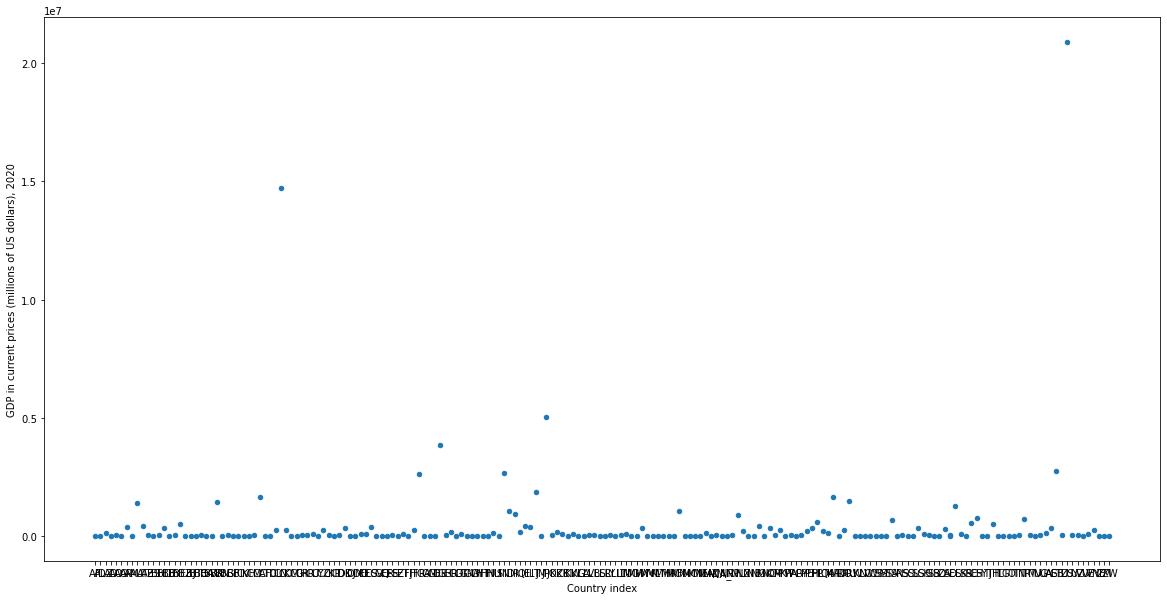

In [43]:
#plt.figure(figsize=(20,10))

country_attr_table_USG.plot(
    'Country index',
    'GDP in current prices (millions of US dollars), 2020', 
    kind = 'scatter',
    figsize=(20,10)
);

{'whiskers': [<matplotlib.lines.Line2D at 0x1295cc2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1295cc9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1295b6f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1295d2070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1295d23a0>],
 'means': []}

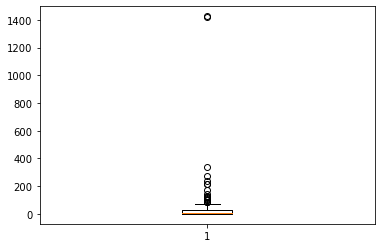

In [44]:
plt.boxplot(country_attr_table_USG['Population mid-year estimates (millions), 2022'])

{'whiskers': [<matplotlib.lines.Line2D at 0x129c6d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x129c6d970>,
 'boxes': [<matplotlib.lines.Line2D at 0x129c61f10>],
 'medians': [<matplotlib.lines.Line2D at 0x129c7a070>],
 'fliers': [<matplotlib.lines.Line2D at 0x129c7a3d0>],
 'means': []}

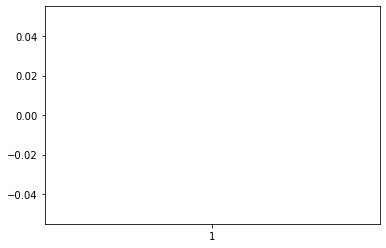

In [45]:
plt.boxplot(country_attr_table_USG['Primary energy production (petajoules), 2019'])

{'whiskers': [<matplotlib.lines.Line2D at 0x129d38a30>,
 'caps': [<matplotlib.lines.Line2D at 0x129d45130>,
 'boxes': [<matplotlib.lines.Line2D at 0x129d386d0>],
 'medians': [<matplotlib.lines.Line2D at 0x129d457f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x129d45b50>],
 'means': []}

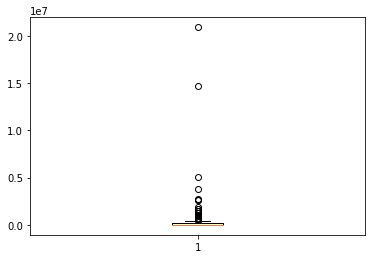

In [46]:
plt.boxplot(country_attr_table_USG['GDP in current prices (millions of US dollars), 2020'])

(array([137.,  26.,  10.,   4.,   4.,   3.,   1.,   1.,   0.,   3.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([1.00000000e-02, 2.37746667e+01, 4.75393333e+01, 7.13040000e+01,
        9.50686667e+01, 1.18833333e+02, 1.42598000e+02, 1.66362667e+02,
        1.90127333e+02, 2.13892000e+02, 2.37656667e+02, 2.61421333e+02,
        2.85186000e+02, 3.08950667e+02, 3.32715333e+02, 3.56480000e+02,
        3.80244667e+02, 4.04009333e+02, 4.27774000e+02, 4.51538667e+02,
        4.75303333e+02, 4.99068000e+02, 5.22832667e+02, 5.46597333e+02,
        5.70362000e+02, 5.94126667e+02, 6.17891333e+02, 6.41656000e+02,
        6.65420667e+02, 6.89185333e+02, 7.12950000e+02, 7.36714667e+02,
        7.6047

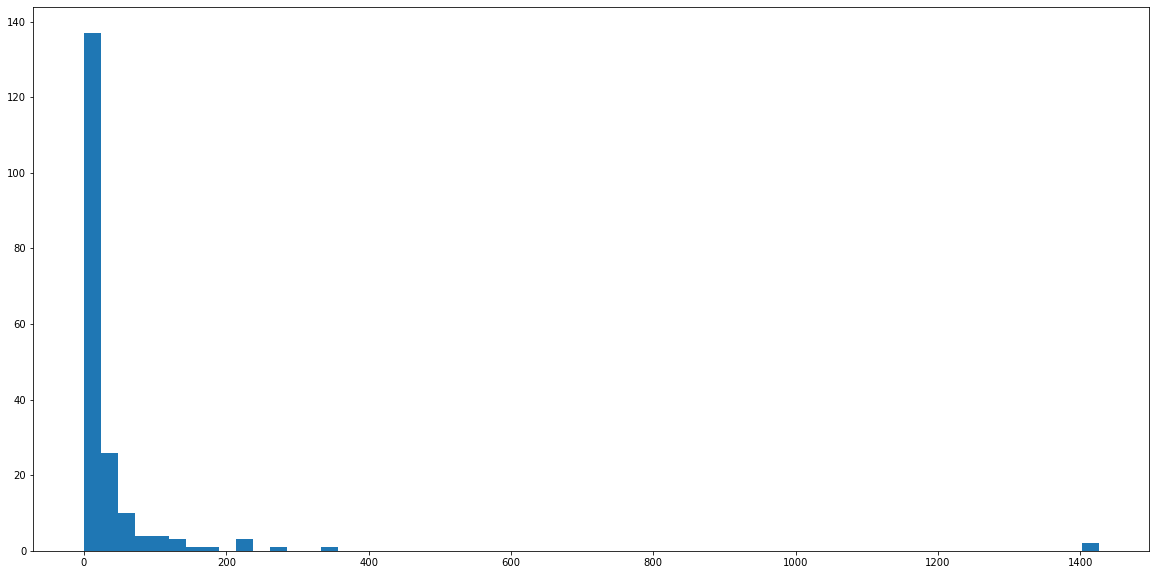

In [47]:
plt.figure(figsize=(20,10))


plt.hist(
    country_attr_table_USG['Population mid-year estimates (millions), 2022'],
    bins = 60
)




(array([158.,  14.,   5.,   3.,   5.,   1.,   0.,   3.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([5.50000000e+01, 3.48283183e+05, 6.96511367e+05, 1.04473955e+06,
        1.39296773e+06, 1.74119592e+06, 2.08942410e+06, 2.43765228e+06,
        2.78588047e+06, 3.13410865e+06, 3.48233683e+06, 3.83056502e+06,
        4.17879320e+06, 4.52702138e+06, 4.87524957e+06, 5.22347775e+06,
        5.57170593e+06, 5.91993412e+06, 6.26816230e+06, 6.61639048e+06,
        6.96461867e+06, 7.31284685e+06, 7.66107503e+06, 8.00930322e+06,
        8.35753140e+06, 8.70575958e+06, 9.05398777e+06, 9.40221595e+06,
        9.75044413e+06, 1.00986723e+07, 1.04469005e+07, 1.07951287e+07,
        1.1143

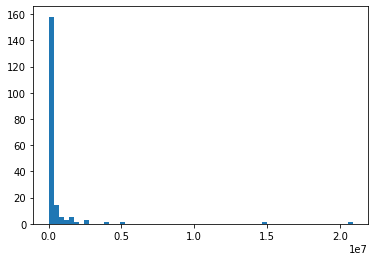

In [48]:
plt.hist(country_attr_table_USG['GDP in current prices (millions of US dollars), 2020'], bins = 60)

(array([149.,  16.,   5.,   6.,   1.,   4.,   0.,   1.,   1.,   0.,   1.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([     0.        ,   1829.08333333,   3658.16666667,   5487.25      ,
          7316.33333333,   9145.41666667,  10974.5       ,  12803.58333333,
         14632.66666667,  16461.75      ,  18290.83333333,  20119.91666667,
         21949.        ,  23778.08333333,  25607.16666667,  27436.25      ,
         29265.33333333,  31094.41666667,  32923.5       ,  34752.58333333,
         36581.66666667,  38410.75      ,  40239.83333333,  42068.91666667,
         43898.        ,  45727.08333333,  47556.16666667,  49385.25      ,
         51214.33333333,  53043.41666667,  54872.5       ,

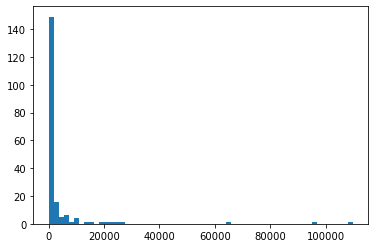

In [49]:
plt.hist(country_attr_table_USG['Primary energy production (petajoules), 2019'], bins = 60)

In [50]:
list(set(country_attr_table_USG['solidarity_group_1']))

[nan, 'USG_1']

In [51]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
]

,Unnamed: 0.1,Unnamed: 0.1.1,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),number of members,solidarity_group_2,main country (by energy),main country (by GDP)
Country,,,,,,,,,,,,,,,
ALBANIA,1,1,AL,41.153332,20.168331,2.84,71.0,14910,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
ANDORRA,3,3,AD,42.546245,1.601554,0.08,1.0,2864,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
ARGENTINA,6,6,AR,-38.416097,-63.616672,45.51,3292.0,383067,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
AUSTRALIA,8,8,AU,-25.274398,133.775136,26.18,18623.0,1423473,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
AUSTRIA,9,9,AT,47.516231,14.550072,8.94,498.0,433258,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUVALU,178,178,TV,-7.109535,177.649330,0.01,0.0,55,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
UKRAINE,180,180,UA,48.379433,31.165580,39.70,2503.0,155582,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES
UNITED KINGDOM,182,182,GB,55.378051,-3.435973,67.51,5087.0,2764198,USG_1,11111,UNITED STATES,76.0,USG_11111,UNITED STATES,UNITED STATES


(array([37., 12.,  1.,  7.,  2.,  0.,  2.,  2.,  2.,  3.,  1.,  2.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e-02, 5.64800e+00, 1.12860e+01, 1.69240e+01, 2.25620e+01,
        2.82000e+01, 3.38380e+01, 3.94760e+01, 4.51140e+01, 5.07520e+01,
        5.63900e+01, 6.20280e+01, 6.76660e+01, 7.33040e+01, 7.89420e+01,
        8.45800e+01, 9.02180e+01, 9.58560e+01, 1.01494e+02, 1.07132e+02,
        1.12770e+02, 1.18408e+02, 1.24046e+02, 1.29684e+02, 1.35322e+02,
        1.40960e+02, 1.46598e+02, 1.52236e+02, 1.57874e+02, 1.63512e+02,
        1.69150e+02, 1.74788e+02, 1.80426e+02, 1.86064e+02, 1.91702e+02,
        1.97340e+02, 2.02978e+02, 2.08616e+02, 2.14254e+02, 2.19892e+02,
        2.25530e+02, 2.31168e+02, 2.36806e+02, 2.42444e+02, 2.48082e+02,
 

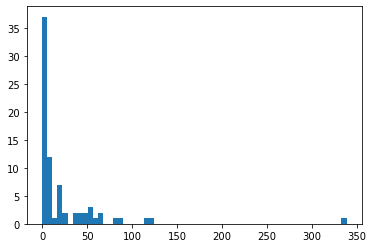

In [52]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [53]:
country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
    ].describe()

,Unnamed: 0.1,Unnamed: 0.1.1,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",number of members
count,76.000000,76.000000,76.000000,76.000000,76.000000,74.000000,7.600000e+01,76.0
mean,95.631579,95.631579,27.588876,17.037525,22.700263,2742.527027,6.993939e+05,76.0
std,51.811670,51.811670,28.197696,75.451207,45.361209,11610.061200,2.506811e+06,0.0
min,1.000000,1.000000,-40.900557,-172.104629,0.010000,0.000000,5.500000e+01,76.0
25%,50.750000,50.750000,7.352034,-6.216423,1.720000,47.250000,1.424850e+04,76.0
50%,99.500000,99.500000,40.808499,15.097732,6.330000,322.000000,7.181850e+04,76.0
75%,135.250000,135.250000,47.732031,29.068809,21.852500,1279.250000,3.676582e+05,76.0
max,185.000000,185.000000,64.963051,179.414413,338.290000,96539.000000,2.089375e+07,76.0


(array([59., 12.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e-02, 3.38380e+01, 6.76660e+01, 1.01494e+02, 1.35322e+02,
        1.69150e+02, 2.02978e+02, 2.36806e+02, 2.70634e+02, 3.04462e+02,
        3.38290e+02]),
 <BarContainer object of 10 artists>)

<Figure size 720x43200 with 0 Axes>

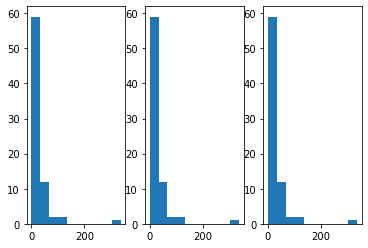

In [54]:
plt.figure(figsize=(10, 600))

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=True)
axs = [ax1,ax2,ax3]

axs[0].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
            ]['Population mid-year estimates (millions), 2022']
)

axs[1].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
            ]['Population mid-year estimates (millions), 2022']
)

axs[2].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
            ]['Population mid-year estimates (millions), 2022']
)

In [56]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[2]
]

IndexError: list index out of range

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)


In [ ]:
plt.figure(figsize=(20,10))


fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=True)
axs = [ax1,ax2,ax3]

axs[0].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
            ]['Population mid-year estimates (millions), 2022']
)

axs[1].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
            ]['Population mid-year estimates (millions), 2022']
)

axs[2].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
            ]['Population mid-year estimates (millions), 2022']
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[6]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[6]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[7]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[7]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group'] == list(set(country_attr_table_USG['solidarity_group']))[8]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[8]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[9]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[9]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[10]
]

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[11]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[11]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[12]
]

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[12]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [ ]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'].isna()
]

In [ ]:
len(country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'].isna()
])

In [ ]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'].isna()
    ]['Population mid-year estimates (millions), 2022'], 
    bins= 20
)

# -----------------

In [ ]:
plt.figure(figsize=(20,10))


plt.boxplot([
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
    ]['Population mid-year estimates (millions), 2022'], 
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[2]
    ]['Population mid-year estimates (millions), 2022'], 
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
    ]['Population mid-year estimates (millions), 2022'],
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
    ]['Population mid-year estimates (millions), 2022'],
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
    ]['Population mid-year estimates (millions), 2022']  

], whis=[0,100]);

In [ ]:
country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[12]
    ]['Population mid-year estimates (millions), 2022']

In [ ]:
plt.hist?

#### Country with unique vote profile

In [ ]:
vote_table_temp = vote_table[
                    [x in list(
                        country_attr_table_USG[
                            country_attr_table_USG['solidarity_group_1'].isna()
                        ]['Country']
                    ) for x in vote_table['Country']]
                ]
vote_table_temp[
    vote_table_tamp[list(vote_table_tamp.columns)[1]].notna()
    &
    vote_table_tamp[list(vote_table_tamp.columns)[2]].notna()
    &
    vote_table_tamp[list(vote_table_tamp.columns)[3]].notna()
    &
    vote_table_tamp[list(vote_table_tamp.columns)[4]].notna()
    &
    vote_table_tamp[list(vote_table_tamp.columns)[5]].notna()
]

In [ ]:
list(vote_table_tamp.columns)

# -----------------------

In [ ]:
country_attr_table_USG['GDP in current prices (millions of US dollars), 2020'].sum()

In [ ]:
# Let's reset the index for our airbnb data

#country_attr_table_USG = country_attr_table_USG.reset_index()

# Now lets group by the cancellation policy and find the average review_scores_value by group
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    )

In [ ]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                'Population mid-year estimates (millions), 2022',
                #'Primary energy production (petajoules), 2019',
                #'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [ ]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_00-100']

In [ ]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_00000']

In [ ]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                #'Population mid-year estimates (millions), 2022',
                'Primary energy production (petajoules), 2019',
                #'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [ ]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_01011']

In [ ]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                #'Population mid-year estimates (millions), 2022',
                #'Primary energy production (petajoules), 2019',
                'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [ ]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                'Population mid-year estimates (millions), 2022',
                'Primary energy production (petajoules), 2019',
                'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [ ]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_00000']